In [51]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib scikit-learn seaborn umap-learn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


In [23]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt

# Aeschi 2019-20 Dataset Cleaning

In [24]:
df = pd.read_csv("../datasets/Aeschi_2019-20.csv")
df.columns

Index(['TIMESTAMP', 'TA', 'RH', 'PA', 'Rg', 'PREC', 'SWC_0.05', 'SWC_0.15',
       'SWC_0.3', 'WFPS_0.05', 'WFPS_0.15', 'WFPS_0.3', 'TS_0.05', 'TS_0.15',
       'TS_0.3', 'PREC_rmean6', 'SWC_0.05_rmean6', 'SWC_0.15_rmean6',
       'SWC_0.3_rmean6', 'WFPS_0.05_rmean6', 'WFPS_0.15_rmean6',
       'WFPS_0.3_rmean6', 'TS_0.05_rmean6', 'TS_0.15_rmean6', 'TS_0.3_rmean6',
       'PREC_rmean6.6', 'PREC_rmean6.12', 'PREC_rmean6.18',
       'SWC_0.05_rmean6.6', 'SWC_0.05_rmean6.12', 'SWC_0.05_rmean6.18',
       'SWC_0.15_rmean6.6', 'SWC_0.15_rmean6.12', 'SWC_0.15_rmean6.18',
       'SWC_0.3_rmean6.6', 'SWC_0.3_rmean6.12', 'SWC_0.3_rmean6.18',
       'WFPS_0.05_rmean6.6', 'WFPS_0.05_rmean6.12', 'WFPS_0.05_rmean6.18',
       'WFPS_0.15_rmean6.6', 'WFPS_0.15_rmean6.12', 'WFPS_0.15_rmean6.18',
       'WFPS_0.3_rmean6.6', 'WFPS_0.3_rmean6.12', 'WFPS_0.3_rmean6.18',
       'TS_0.05_rmean6.6', 'TS_0.05_rmean6.12', 'TS_0.05_rmean6.18',
       'TS_0.15_rmean6.6', 'TS_0.15_rmean6.12', 'TS_0.15_rmean6.18',

In [25]:
df.head(10)

TIMESTAMP         TA         RH         PA        Rg  PREC  \
0  2019-07-03 00:15  18.900000  68.100000  96.410000  0.000000   0.0   
1  2019-07-03 00:45  18.366667  70.800000  96.396667  0.000000   0.0   
2  2019-07-03 01:15  18.266667  71.633333  96.400000  0.000000   0.0   
3  2019-07-03 01:45  18.600000  69.633333  96.396667  0.000000   0.0   
4  2019-07-03 02:15  18.600000  68.400000  96.386667  0.000000   0.0   
5  2019-07-03 02:45  18.233333  69.166667  96.390000  0.000000   0.0   
6  2019-07-03 03:15  18.200000  67.333333  96.393333  0.000000   0.0   
7  2019-07-03 03:45  17.966667  66.900000  96.406667  0.000000   0.0   
8  2019-07-03 04:15  17.933333  64.766667  96.423333  0.333333   0.0   
9  2019-07-03 04:45  17.966667  64.100000  96.423333  4.666667   0.0   

   SWC_0.05  SWC_0.15  SWC_0.3  WFPS_0.05  WFPS_0.15  WFPS_0.3  TS_0.05  \
0       NaN       NaN      NaN        NaN        NaN       NaN      NaN   
1       NaN       NaN      NaN        NaN        NaN       NaN      NaN   
2       NaN       NaN      NaN        NaN        NaN       NaN      NaN   
3       NaN       NaN      NaN        NaN        NaN       NaN      NaN   
4       NaN       NaN      NaN        NaN        NaN       NaN      NaN   
5       NaN       NaN      NaN        NaN        NaN       NaN      NaN   
6       NaN       NaN      NaN        NaN        NaN       NaN      NaN   
7       NaN       NaN      NaN        NaN        NaN       NaN      NaN   
8       NaN       NaN      NaN        NaN        NaN       NaN      NaN   
9       NaN       NaN      NaN        NaN        NaN       NaN      NaN   

   TS_0.15  TS_0.3  PREC_rmean6  SWC_0.05_rmean6  SWC_0.15_rmean6  \
0      NaN     NaN          0.0              NaN              NaN   
1      NaN     NaN          0.0              NaN              NaN   
2      NaN     NaN          0.0              NaN              NaN   
3      NaN     NaN          0.0              NaN              NaN   
4      NaN     NaN          0.0              NaN              NaN   
5      NaN     NaN          0.0              NaN              NaN   
6      NaN     NaN          0.0              NaN              NaN   
7      NaN     NaN          0.0              NaN              NaN   
8      NaN     NaN          0.0              NaN              NaN   
9      NaN     NaN          0.0              NaN              NaN   

   SWC_0.3_rmean6  WFPS_0.05_rmean6  WFPS_0.15_rmean6  WFPS_0.3_rmean6  \
0             NaN               NaN               NaN              NaN   
1             NaN               NaN               NaN              NaN   
2             NaN               NaN               NaN              NaN   
3             NaN               NaN               NaN              NaN   
4             NaN               NaN               NaN              NaN   
5             NaN               NaN               NaN              NaN   
6             NaN               NaN               NaN              NaN   
7             NaN               NaN               NaN              NaN   
8             NaN               NaN               NaN              NaN   
9             NaN               NaN               NaN              NaN   

   TS_0.05_rmean6  TS_0.15_rmean6  TS_0.3_rmean6  PREC_rmean6.6  \
0             NaN             NaN            NaN            0.0   
1             NaN             NaN            NaN            0.0   
2             NaN             NaN            NaN            0.0   
3             NaN             NaN            NaN            0.0   
4             NaN             NaN            NaN            0.0   
5             NaN             NaN            NaN            0.0   
6             NaN             NaN            NaN            0.0   
7             NaN             NaN            NaN            0.0   
8             NaN             NaN            NaN            0.0   
9             NaN             NaN            NaN            0.0   

   PREC_rmean6.12  PREC_rmean6.18  SWC_0.05_rmean6.6  SWC_0.05_rmean6.12  \
0 

In [32]:
cols = [
    # Target
    "N2O_flag0_ustar",

    # Timestamp
    "TIMESTAMP",
    
    # Predictors
    "NEE_f",
    "GPP_f",
    "Reco_f",
    "Rg",
    "TA",
    "PREC",
    "VPD",                     # Vapor pressure deficit
    "SWC_0.05",
    "SWC_0.15",
    "SWC_0.3",
    "TS_0.05",
    "TS_0.15",
    "TS_0.3",
    "harvest",
]

aeschi_19_20 = df[cols]

rename_map = {
    "N2O_flag0_ustar": "N2O_Flux",
    "TIMESTAMP": "Timestamp",
    "NEE_f": "NEE",            # Net CO₂ exchange between field and atmosphere (positive = CO₂ released, negative = CO₂ uptake)
    "GPP_f": "GPP",            # Total CO₂ fixed by photosynthesis (proxy for plant growth)
    "Reco_f": "RECO",          # CO₂ emitted via respiration of plants and soil organisms
    "Rg": "SolarRadiation",
    "TA": "AirTemp",
    "PREC": "Precipitation",
    "SWC_0.05": "SoilWater_5cm",
    "SWC_0.15": "SoilWater_15cm",
    "SWC_0.3": "SoilWater_30cm",
    "TS_0.05": "SoilTemp_5cm",
    "TS_0.15": "SoilTemp_15cm",
    "TS_0.3": "SoilTemp_30cm",
    "harvest": "Mowing",
}

aeschi = aeschi_19_20.rename(columns=rename_map)

# --- Parse datetime ---
aeschi["Timestamp"] = pd.to_datetime(aeschi["Timestamp"])
aeschi = aeschi.sort_values("Timestamp")

# Remove duplicate timestamps if any
aeschi = aeschi.drop_duplicates(subset=["Timestamp"], keep="first")

aeschi["year"] = aeschi["Timestamp"].dt.year
aeschi["month"] = aeschi["Timestamp"].dt.month
aeschi["hour"] = aeschi["Timestamp"].dt.hour
aeschi["day"] = aeschi["Timestamp"].dt.day

# --- Prepare for lag feature computation ---
aeschi = aeschi.set_index("Timestamp").sort_index()

# Continuous predictors for lags
meteo_predictors = [
    "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm"
]

lags_days = [1, 3, 5, 7]

# Compute lags
for var in meteo_predictors:
    for lag in lags_days:
        aeschi[f"{var}_lag{lag}d"] = aeschi[var].shift(freq=pd.Timedelta(days=lag))

# --- transformation ---
aeschi = aeschi[aeschi["N2O_Flux"].notna()]
aeschi["N2O_Flux_ln"] = np.where(
    aeschi["N2O_Flux"] > 0,
    np.log1p(aeschi["N2O_Flux"]),
    0  # replace neg with 0
)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [33]:
aeschi.head(10)

N2O_Flux       NEE        GPP       RECO  SolarRadiation  \
Timestamp                                                                       
2019-07-03 14:45:00 -0.694262 -1.334854  13.239877  11.905023      737.666667   
2019-07-03 15:15:00  0.600286 -9.021352  20.950640  11.929288      663.666667   
2019-07-03 15:45:00  0.223581 -3.687444  15.613504  11.926059      504.333333   
2019-07-03 16:15:00  0.477189 -1.181895  13.063521  11.881626      418.333333   
2019-07-03 16:45:00  0.580062 -1.327793  13.082796  11.755004      297.333333   
2019-07-03 17:45:00  0.489334  0.751450  10.751303  11.502753      208.333333   
2019-07-03 18:15:00  0.518727  0.016413  11.401526  11.417938      214.000000   
2019-07-03 18:45:00  0.275285 -0.211964  11.613206  11.401242      198.000000   
2019-07-03 19:15:00 -0.317334  1.299800   9.894818  11.194618       94.666667   
2019-07-03 20:15:00  0.188172  2.811274   8.053479  10.864753        8.000000   

                       AirTemp  Precipitation      VPD  SoilWater_5cm  \
Timestamp                                                               
2019-07-03 14:45:00  26.133333            0.0  1699.23      19.410920   
2019-07-03 15:15:00  26.200000            0.0  1702.54      19.410920   
2019-07-03 15:45:00  26.200000            0.0  1716.11      19.301757   
2019-07-03 16:15:00  26.100000            0.0  1703.75      19.276050   
2019-07-03 16:45:00  25.800000            0.0  1649.49      19.224560   
2019-07-03 17:45:00  25.200000            0.0  1520.39      19.140760   
2019-07-03 18:15:00  25.000000            0.0  1489.76      19.140760   
2019-07-03 18:45:00  24.966667            0.0  1467.89      19.108477   
2019-07-03 19:15:00  24.466667            0.0  1370.66      19.018010   
2019-07-03 20:15:00  23.666667            0.0  1278.22      18.998597   

                     SoilWater_15cm  SoilWater_30cm  SoilTemp_5cm  \
Timestamp                                                           
2019-07-03 14:45:00       23.845750       20.022300     27.000000   
2019-07-03 15:15:00       23.845750       20.003320     26.900000   
2019-07-03 15:45:00       23.845750       20.015973     26.466667   
2019-07-03 16:15:00       23.851513       19.996993     26.166667   
2019-07-03 16:45:00       23.851513       20.022297     26.000000   
2019-07-03 17:45:00       23.845750       20.028620     25.666667   
2019-07-03 18:15:00       23.845750       20.034943     25.533333   
2019-07-03 18:45:00       23.839987       20.015973     25.366667   
2019-07-03 19:15:00       23.811160       20.028617     25.200000   
2019-07-03 20:15:00       23.759217       20.041270     24.666667   

                     SoilTemp_15cm  SoilTemp_30cm  Mowing    year  month  \
Timestamp                                                                  
2019-07-03 14:45:00      25.000000      23.800000     0.0  2019.0    7.0   
2019-07-03 15:15:00      25.133333      23.866667     0.0  2019.0    7.0   
2019-07-03 15:45:00      25.266667      23.966667     0.0  2019.0    7.0   
2019-07-03 16:15:00      25.400000      24.033333     0.0  2019.0    7.0   
2019-07-03 16:45:00      25.400000      24.100000     0.0  2019.0    7.0   
2019-07-03 17:45:00      25.400000      24.233333     0.0  2019.0    7.0   
2019-07-03 18:15:00      25.400000      24.300000     0.0  2019.0    7.0   
2019-07-03 18:45:00      25.366667      24.333333     0.0  2019.0    7.0   
2019-07-03 19:15:00      25.300000      24.400000     0.0  2019.0    7.0   
2019-07-03 20:15:00      25.200000      24.433333     0.0  2019.0    7.0   

                     hour  day  NEE_lag1d  NEE_lag3d  NEE_lag5d  NEE_lag7d  \
Timestamp                                                                    
2019-07-03 14:45:00  14.0  3.0        NaN        NaN        NaN        NaN   
2019-07-03 15:15:00  15.0  3.0        NaN        NaN        NaN        NaN   
2019-07-03 15:45:00  15.0  3.0        NaN        NaN        NaN        NaN   
2019-07-03 16:15:00  16.0  3.0        N

# Further Analysis and Checks

In [36]:
# Ensure timestamp is datetime and sorted (already done by setting it as index)
# aeschi is already sorted by index since we used set_index() and sort_index()

# Compute time difference between consecutive timestamps using the index
aeschi["time_diff"] = aeschi.index.to_series().diff()

# Look at large gaps
print(aeschi["time_diff"].describe())
aeschi[aeschi["time_diff"] > pd.Timedelta("3 days")].head(50)

count                         1831
mean     0 days 06:23:53.315128345
std      9 days 21:01:31.882388844
min                0 days 00:30:00
25%                0 days 00:30:00
50%                0 days 00:30:00
75%                0 days 00:30:00
max              422 days 15:00:00
Name: time_diff, dtype: object


N2O_Flux       NEE       GPP      RECO  SolarRadiation  \
Timestamp                                                                     
2020-09-17 11:15:00 -0.376863  0.982703  4.176756  5.159459      567.111113   

                       AirTemp  Precipitation      VPD  SoilWater_5cm  \
Timestamp                                                               
2020-09-17 11:15:00  22.922222            0.0  1152.78      19.812986   

                     SoilWater_15cm  SoilWater_30cm  SoilTemp_5cm  \
Timestamp                                                           
2020-09-17 11:15:00       18.195187       27.208053     21.347222   

                     SoilTemp_15cm  SoilTemp_30cm  Mowing    year  month  \
Timestamp                                                                  
2020-09-17 11:15:00      19.330555      19.795555     0.0  2020.0    9.0   

                     hour   day  NEE_lag1d  NEE_lag3d  NEE_lag5d  NEE_lag7d  \
Timestamp                                                                     
2020-09-17 11:15:00  11.0  17.0 -15.322482        NaN        NaN        NaN   

                     GPP_lag1d  GPP_lag3d  GPP_lag5d  GPP_lag7d  RECO_lag1d  \
Timestamp                                                                     
2020-09-17 11:15:00  20.509942        NaN        NaN        NaN     5.18746   

                     RECO_lag3d  RECO_lag5d  RECO_lag7d  SolarRadiation_lag1d  \
Timestamp                                                                       
2020-09-17 11:15:00         NaN         NaN         NaN            599.688883   

                     SolarRadiation_lag3d  SolarRadiation_lag5d  \
Timestamp                                                         
2020-09-17 11:15:00             608.34444            631.799997   

                     SolarRadiation_lag7d  AirTemp_lag1d  AirTemp_lag3d  \
Timestamp                                                                 
2020-09-17 11:15:00            615.994443      23.237222      23.876667   

                     AirTemp_lag5d  AirTemp_lag7d  Precipitation_lag1d  \
Timestamp                                                                
2020-09-17 11:15:00      23.172777      22.731667                  0.0   

                     Precipitation_lag3d  Precipitation_lag5d  \
Timestamp                                                       
2020-09-17 11:15:00                  0.0                  0.0   

                     Precipitation_lag7d  VPD_lag1d  VPD_lag3d  VPD_lag5d  \
Timestamp                                                                   
2020-09-17 11:15:00                  0.0        NaN        NaN        NaN   

                     VPD_lag7d  SoilWater_5cm_lag1d  SoilWater_5cm_lag3d  \
Timestamp                                                                  
2020-09-17 11:15:00        NaN            19.910628            23.253693   

                     SoilWater_5cm_lag5d  SoilWater_5cm_lag7d  \
Timestamp                                                       
2020-09-17 11:15:00            23.740733             24.79958   

                     SoilWater_15cm_lag1d  SoilWater_15cm_lag3d  \
Timestamp                                                         
2020-09-17 11:15:00             18.436653             19.121291   

                     SoilWater_15cm_lag5d  SoilWater_15cm_lag7d  \
Timestamp                                                         
2020-09-17 11:15:00             19.541019             19.837556   

                     SoilWater_30cm_lag1d  SoilWater_30cm_lag3d  \
Timestamp                                                         
2020-09-17 11:15:00             27.295731              28.05831   

                     SoilWater_30cm_lag5d  SoilWater_30cm_lag7d  \
Timestamp                                                         
2020-09-17 11:15:00             28.568566             28.982339   

                     SoilTemp_5cm_lag1d  SoilTemp_5cm_lag3d  \
Timestamp                      

In [37]:
# Round timestamps down to the calendar day
aeschi["Date"] = aeschi.index.floor("D")

# --- Aggregate daily ---
aeschi_daily = (
    aeschi
    .groupby("Date", dropna=False)
    .agg({
        # Continuous fluxes and predictors — daily mean
        "N2O_Flux": "mean",
        "NEE": "mean",
        "GPP": "mean",
        "RECO": "mean",
        "SolarRadiation": "mean",
        "AirTemp": "mean",
        "VPD": "mean",
        "SoilWater_5cm": "mean",
        "SoilWater_15cm": "mean",
        "SoilWater_30cm": "mean",
        "SoilTemp_5cm": "mean",
        "SoilTemp_15cm": "mean",
        "SoilTemp_30cm": "mean",

        # Precipitation — total per day
        "Precipitation": "sum",

        # Management events — any event that day
        "Mowing": "max",
    })
    .reset_index()
    .sort_values("Date")
)

print(f"Aggregated daily: {aeschi_daily.shape}")

# ==========================================================
# --- Compute lag features (calendar-based) ---
# ==========================================================
meteo_predictors = [
    "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm"
]
lags_days = [1, 3, 5, 7]

# Set Date as index for lag computation
aeschi_daily = aeschi_daily.set_index("Date").sort_index()

for var in meteo_predictors:
    for lag in lags_days:
        aeschi_daily[f"{var}_lag{lag}d"] = aeschi_daily[var].shift(freq=pd.Timedelta(days=lag))

# ==========================================================
# --- Add temporal helpers ---
# ==========================================================
aeschi_daily = aeschi_daily.reset_index()
aeschi_daily["Date"] = pd.to_datetime(aeschi_daily["Date"])
aeschi_daily["year"] = aeschi_daily["Date"].dt.year
aeschi_daily["month"] = aeschi_daily["Date"].dt.month
aeschi_daily = aeschi_daily[aeschi_daily["N2O_Flux"].notna()]

# ==========================================================
# --- Recalculate log-transform (after aggregation) ---
# ==========================================================
aeschi_daily["N2O_Flux_ln"] = np.where(
    aeschi_daily["N2O_Flux"] > 0,
    np.log1p(aeschi_daily["N2O_Flux"]),
    0
)

# ==========================================================
# --- Set Date as index for final dataframe ---
# ==========================================================
aeschi_daily = aeschi_daily.set_index("Date").sort_index()

# ==========================================================
# --- Final summary ---
# ==========================================================
print(f"Daily aggregated shape: {aeschi_daily.shape}, index unique = {aeschi_daily.index.is_unique}")
aeschi_daily.head(3)

Aggregated daily: (67, 16)
Daily aggregated shape: (67, 70), index unique = True


N2O_Flux       NEE        GPP       RECO  SolarRadiation  \
Date                                                                   
2019-07-03  0.261522  1.422826   9.662703  11.085529      238.904762   
2019-07-04  0.187638  0.063560  10.009349  10.072909      356.314815   
2019-07-05  0.150162 -1.093750  12.998129  11.904379      610.333333   

              AirTemp          VPD  SoilWater_5cm  SoilWater_15cm  \
Date                                                                
2019-07-03  24.169048  1377.410286      19.090886       23.786753   
2019-07-04  21.798148  1325.338694      18.812956       23.458938   
2019-07-05  26.825490  1837.927412      19.219873       23.500998   

            SoilWater_30cm  SoilTemp_5cm  SoilTemp_15cm  SoilTemp_30cm  \
Date                                                                     
2019-07-03       20.027716     25.040476      25.111905      24.204762   
2019-07-04       19.794913     24.280556      23.937037      23.544444   
2019-07-05       19.762776     31.225490      25.676471      24.056863   

            Precipitation  Mowing  NEE_lag1d  NEE_lag3d  NEE_lag5d  NEE_lag7d  \
Date                                                                            
2019-07-03            0.0     0.0        NaN        NaN        NaN        NaN   
2019-07-04            0.0     0.0   1.422826        NaN        NaN        NaN   
2019-07-05            0.0     0.0   0.063560        NaN        NaN        NaN   

            GPP_lag1d  GPP_lag3d  GPP_lag5d  GPP_lag7d  RECO_lag1d  \
Date                                                                 
2019-07-03        NaN        NaN        NaN        NaN         NaN   
2019-07-04   9.662703        NaN        NaN        NaN   11.085529   
2019-07-05  10.009349        NaN        NaN        NaN   10.072909   

            RECO_lag3d  RECO_lag5d  RECO_lag7d  SolarRadiation_lag1d  \
Date                                                                   
2019-07-03         NaN         NaN         NaN                   NaN   
2019-07-04         NaN         NaN         NaN            238.904762   
2019-07-05         NaN         NaN         NaN            356.314815   

            SolarRadiation_lag3d  SolarRadiation_lag5d  SolarRadiation_lag7d  \
Date                                                                           
2019-07-03                   NaN                   NaN                   NaN   
2019-07-04                   NaN                   NaN                   NaN   
2019-07-05                   NaN                   NaN                   NaN   

            AirTemp_lag1d  AirTemp_lag3d  AirTemp_lag5d  AirTemp_lag7d  \
Date                                                                     
2019-07-03            NaN            NaN            NaN            NaN   
2019-07-04      24.169048            NaN            NaN            NaN   
2019-07-05      21.798148            NaN            NaN            NaN   

            Precipitation_lag1d  Precipitation_lag3d  Precipitation_lag5d  \
Date                                                                        
2019-07-03                  NaN                  NaN                  NaN   
2019-07-04                  0.0                  NaN                  NaN   
2019-07-05                  0.0                  NaN                  NaN   

            Precipitation_lag7d    VPD_lag1d  VPD_lag3d  VPD_lag5d  VPD_lag7d  \
Date                                                                            
2019-07-03                  NaN          NaN        NaN        NaN        NaN   
2019-07-04                  NaN  1377.410286        NaN        NaN        NaN   
2019-07-05                  NaN  1325.338694        NaN        NaN        NaN   

            SoilWater_5cm_lag1d  SoilWater_5cm_lag3d  SoilWater_5cm_lag5d  \
Date                                                                        
2019-07-03                  NaN                  NaN                  NaN   
2019-07-04           

In [41]:
fert_info = pd.read_csv("../datasets/FertilizationInfo_DataScienceLab/Aeschi_2019-20.csv")

# --- Reset index to make Date a column ---
aeschi_daily = aeschi_daily.reset_index()

# --- Convert fert_info["date"] (yyyymmdd int/string) to datetime ---
# Handles both integer and string formats automatically
aeschi_daily["Date"] = pd.to_datetime(aeschi_daily["Date"], errors="coerce")
fert_info["date"] = pd.to_datetime(fert_info["date"].astype(str), format="%Y%m%d", errors="coerce")

# --- Merge on Date only (no Parcel for Aeschi) ---
aeschi_daily = aeschi_daily.merge(
    fert_info,
    how="left",
    left_on="Date",
    right_on="date"
)

# --- Clean up redundant columns if desired ---
aeschi_daily.drop(columns=["date"], inplace=True)

# --- Optional: rename fertilizer column for clarity ---
aeschi_daily.rename(columns={"N(kg/ha)": "Fertilizer_N_kg_ha"}, inplace=True)

# --- Set Date back as index if desired ---
aeschi_daily = aeschi_daily.set_index("Date").sort_index()

aeschi_daily.head()

N2O_Flux       NEE        GPP       RECO  SolarRadiation  \
Date                                                                   
2019-07-03  0.261522  1.422826   9.662703  11.085529      238.904762   
2019-07-04  0.187638  0.063560  10.009349  10.072909      356.314815   
2019-07-05  0.150162 -1.093750  12.998129  11.904379      610.333333   
2019-07-06  0.917833  5.175059   4.066735   9.241793      274.142857   
2019-07-07  2.384449  9.017771   0.948923   9.966694      473.440000   

              AirTemp          VPD  SoilWater_5cm  SoilWater_15cm  \
Date                                                                
2019-07-03  24.169048  1377.410286      19.090886       23.786753   
2019-07-04  21.798148  1325.338694      18.812956       23.458938   
2019-07-05  26.825490  1837.927412      19.219873       23.500998   
2019-07-06  20.401587   547.785158      18.501303       23.261269   
2019-07-07  24.404167  1119.381794      20.909239       23.301095   

            SoilWater_30cm  SoilTemp_5cm  SoilTemp_15cm  SoilTemp_30cm  \
Date                                                                     
2019-07-03       20.027716     25.040476      25.111905      24.204762   
2019-07-04       19.794913     24.280556      23.937037      23.544444   
2019-07-05       19.762776     31.225490      25.676471      24.056863   
2019-07-06       19.707603     23.812698      23.933333      23.869841   
2019-07-07       19.589764     24.479412      23.204902      22.716667   

            Precipitation  Mowing  NEE_lag1d  NEE_lag3d  NEE_lag5d  NEE_lag7d  \
Date                                                                            
2019-07-03          0.000     0.0        NaN        NaN        NaN        NaN   
2019-07-04          0.000     0.0   1.422826        NaN        NaN        NaN   
2019-07-05          0.000     0.0   0.063560        NaN        NaN        NaN   
2019-07-06          3.485     0.0  -1.093750   1.422826        NaN        NaN   
2019-07-07          5.270     0.0   5.175059   0.063560        NaN        NaN   

            GPP_lag1d  GPP_lag3d  GPP_lag5d  GPP_lag7d  RECO_lag1d  \
Date                                                                 
2019-07-03        NaN        NaN        NaN        NaN         NaN   
2019-07-04   9.662703        NaN        NaN        NaN   11.085529   
2019-07-05  10.009349        NaN        NaN        NaN   10.072909   
2019-07-06  12.998129   9.662703        NaN        NaN   11.904379   
2019-07-07   4.066735  10.009349        NaN        NaN    9.241793   

            RECO_lag3d  RECO_lag5d  RECO_lag7d  SolarRadiation_lag1d  \
Date                                                                   
2019-07-03         NaN         NaN         NaN                   NaN   
2019-07-04         NaN         NaN         NaN            238.904762   
2019-07-05         NaN         NaN         NaN            356.314815   
2019-07-06   11.085529         NaN         NaN            610.333333   
2019-07-07   10.072909         NaN         NaN            274.142857   

            SolarRadiation_lag3d  SolarRadiation_lag5d  SolarRadiation_lag7d  \
Date                                                                           
2019-07-03                   NaN                   NaN                   NaN   
2019-07-04                   NaN                   NaN                   NaN   
2019-07-05                   NaN                   NaN                   NaN   
2019-07-06            238.904762                   NaN                   NaN   
2019-07-07            356.314815                   NaN                   NaN   

            AirTemp_lag1d  AirTemp_lag3d  AirTemp_lag5d  AirTemp_lag7d  \
Date                                                                     
2019-07-03            NaN            NaN            NaN            NaN   
2019-07-04      24.169048            NaN            NaN            NaN   
2019-07-05      21.798148            NaN            NaN            NaN   
2019-07-0

In [43]:
aeschi.to_csv("../datasets/Aeschi_2019-20_clean.csv")
aeschi_daily.to_csv("../datasets/Aeschi_Daily_2019-20.csv")

In [42]:
aeschi_daily[aeschi_daily["Fertilizer_N_kg_ha"].notna()]

N2O_Flux       NEE       GPP      RECO  SolarRadiation   AirTemp  \
Date                                                                           
2020-10-20  0.522588  2.858467  0.264401  3.122868      189.193401  9.133713   

                   VPD  SoilWater_5cm  SoilWater_15cm  SoilWater_30cm  \
Date                                                                    
2020-10-20  296.378216      26.171078       23.572734       30.903803   

            SoilTemp_5cm  SoilTemp_15cm  SoilTemp_30cm  Precipitation  Mowing  \
Date                                                                            
2020-10-20      9.009269       8.837456       9.986959            0.0     0.0   

            NEE_lag1d  NEE_lag3d  NEE_lag5d  NEE_lag7d  GPP_lag1d  GPP_lag3d  \
Date                                                                           
2020-10-20  -0.526278   0.316452    2.11858    0.20127    4.25011   2.968709   

            GPP_lag5d  GPP_lag7d  RECO_lag1d  RECO_lag3d  RECO_lag5d  \
Date                                                                   
2020-10-20   0.921283   3.153531    3.723833    3.285161    3.039863   

            RECO_lag7d  SolarRadiation_lag1d  SolarRadiation_lag3d  \
Date                                                                 
2020-10-20      3.3548            257.433334             80.522661   

            SolarRadiation_lag5d  SolarRadiation_lag7d  AirTemp_lag1d  \
Date                                                                    
2020-10-20             59.430229            187.652613      11.803148   

            AirTemp_lag3d  AirTemp_lag5d  AirTemp_lag7d  Precipitation_lag1d  \
Date                                                                           
2020-10-20        8.05019       6.691209        6.07415                  0.0   

            Precipitation_lag3d  Precipitation_lag5d  Precipitation_lag7d  \
Date                                                                        
2020-10-20                0.136                1.156                  0.0   

             VPD_lag1d   VPD_lag3d   VPD_lag5d   VPD_lag7d  \
Date                                                         
2020-10-20  508.080833  169.648039  191.008929  137.616606   

            SoilWater_5cm_lag1d  SoilWater_5cm_lag3d  SoilWater_5cm_lag5d  \
Date                                                                        
2020-10-20             25.84559            27.502675            26.254837   

            SoilWater_5cm_lag7d  SoilWater_15cm_lag1d  SoilWater_15cm_lag3d  \
Date                                                                          
2020-10-20             27.40692             23.740299             24.726311   

            SoilWater_15cm_lag5d  SoilWater_15cm_lag7d  SoilWater_30cm_lag1d  \
Date                                                                           
2020-10-20             23.285734             23.945626             30.931239   

            SoilWater_30cm_lag3d  SoilWater_30cm_lag5d  SoilWater_30cm_lag7d  \
Date                                                                           
2020-10-20             31.180768             30.841837             31.170232   

            SoilTemp_5cm_lag1d  SoilTemp_5cm_lag3d  SoilTemp_5cm_lag5d  \
Date                                                                     
2020-10-20           12.672778           10.182325            8.890163   

            SoilTemp_5cm_lag7d  SoilTemp_15cm_lag1d  SoilTemp_15cm_lag3d  \
Date                                                                       
2020-10-20            9.940457            10.436204            10.154839   

            SoilTemp_15cm_lag5d  SoilTemp_15cm_lag7d  SoilTemp_30cm_lag1d  \
Date                                                                        
2020-10-20             9.405899              9.95317            10.425277   

            SoilTemp_30cm_lag3d  SoilTemp_30cm_lag5d  SoilTemp_30cm_lag7d  \
Date                                         

# Analysis plots

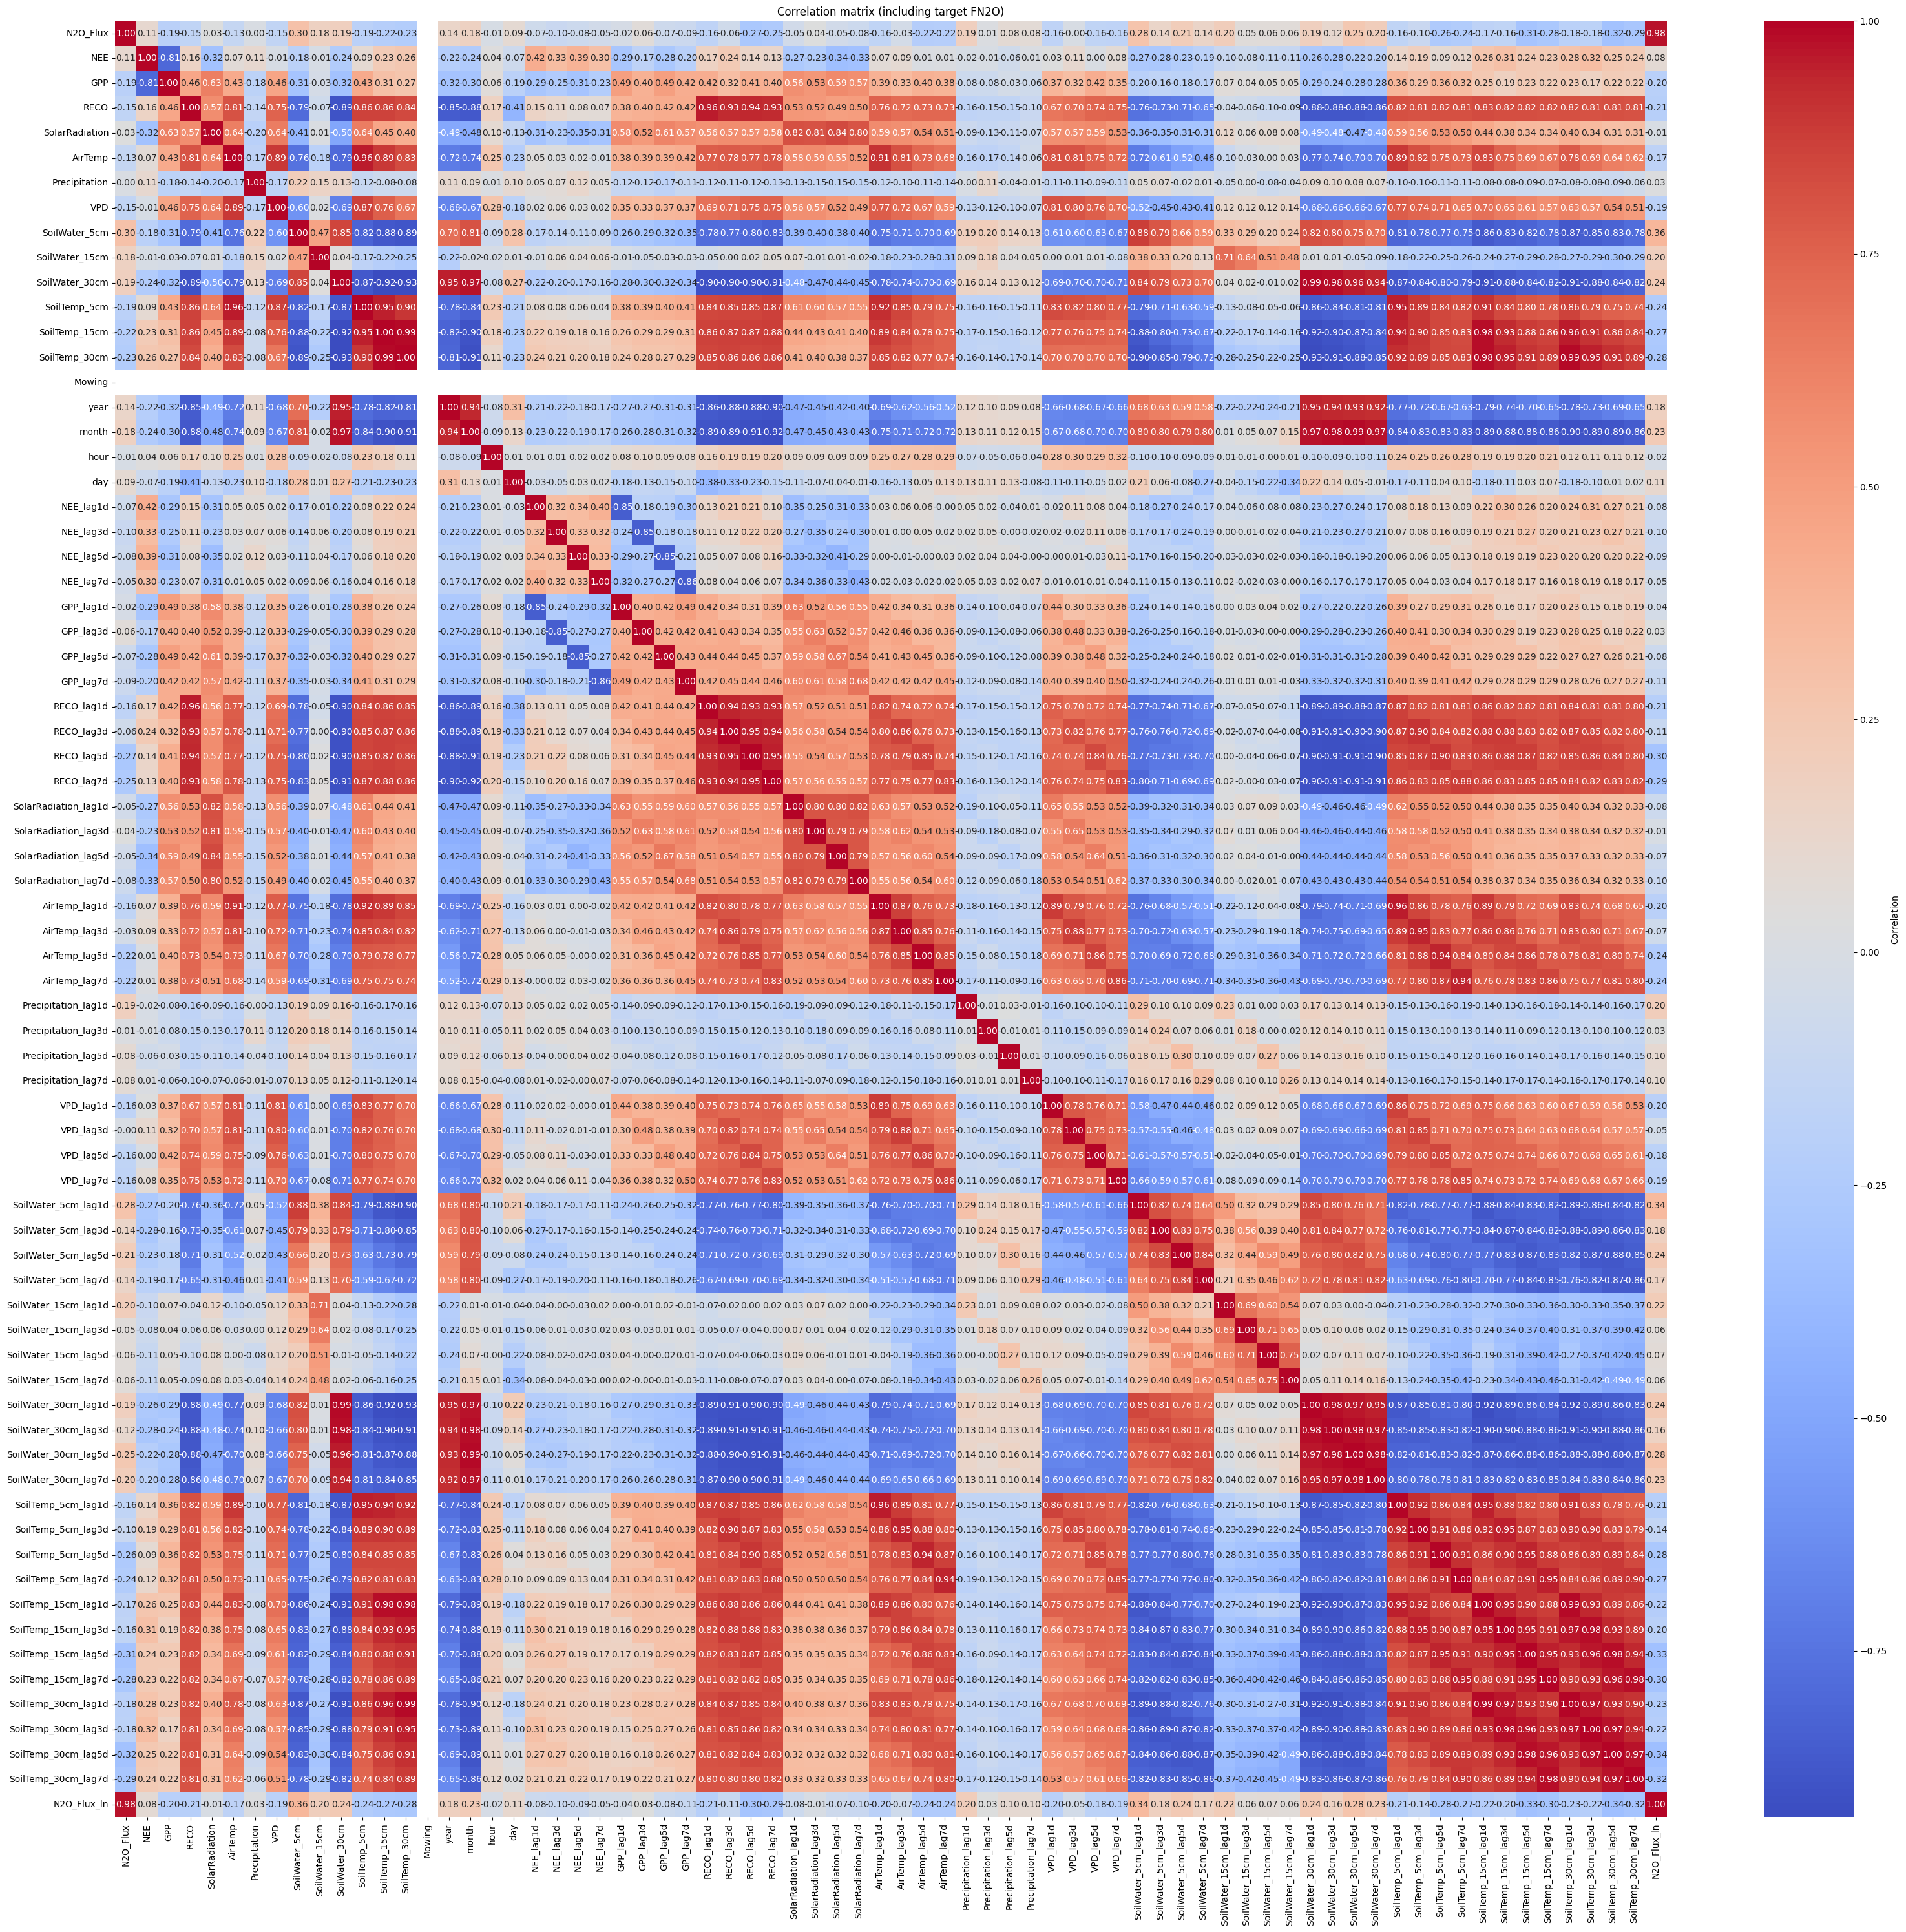

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (Pearson by default)
corr = aeschi.corr(numeric_only=True)

plt.figure(figsize=(32,30))
sns.heatmap(
    corr, 
    annot=True, fmt=".2f", cmap="coolwarm",
    cbar_kws={'label': 'Correlation'}
)
plt.title("Correlation matrix (including target FN2O)")
plt.tight_layout()
plt.show()

In [47]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

def plot_time_series(df, vars_to_plot):
    """
    Plot time series of selected variables with real time gaps shown on the x-axis.
    Automatically formats time labels and adds axis labels.
    """
    df = df.copy().sort_index()

    # --- Ensure datetime index ---
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # --- Layout ---
    n_cols = 3
    n_rows = int(len(vars_to_plot) / n_cols) + (len(vars_to_plot) % n_cols > 0)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12), sharex=True)
    axes = axes.flatten()

    # --- Plot each variable ---
    for i, var in enumerate(vars_to_plot):
        ax = axes[i]
        ax.plot(df.index, df[var], lw=1)
        ax.set_title(var, fontsize=10)
        ax.set_ylabel(var)
        ax.grid(True, alpha=0.3)

        # Format the x-axis as dates
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
        ax.tick_params(axis='x', rotation=45)

    # --- Remove unused axes if any ---
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # --- Common labels and formatting ---
    fig.suptitle("Time Series", fontsize=14)
    fig.text(0.5, 0.04, "Date", ha='center', fontsize=12)
    fig.tight_layout(rect=[0, 0.05, 1, 0.97])
    plt.show()

Raw Data


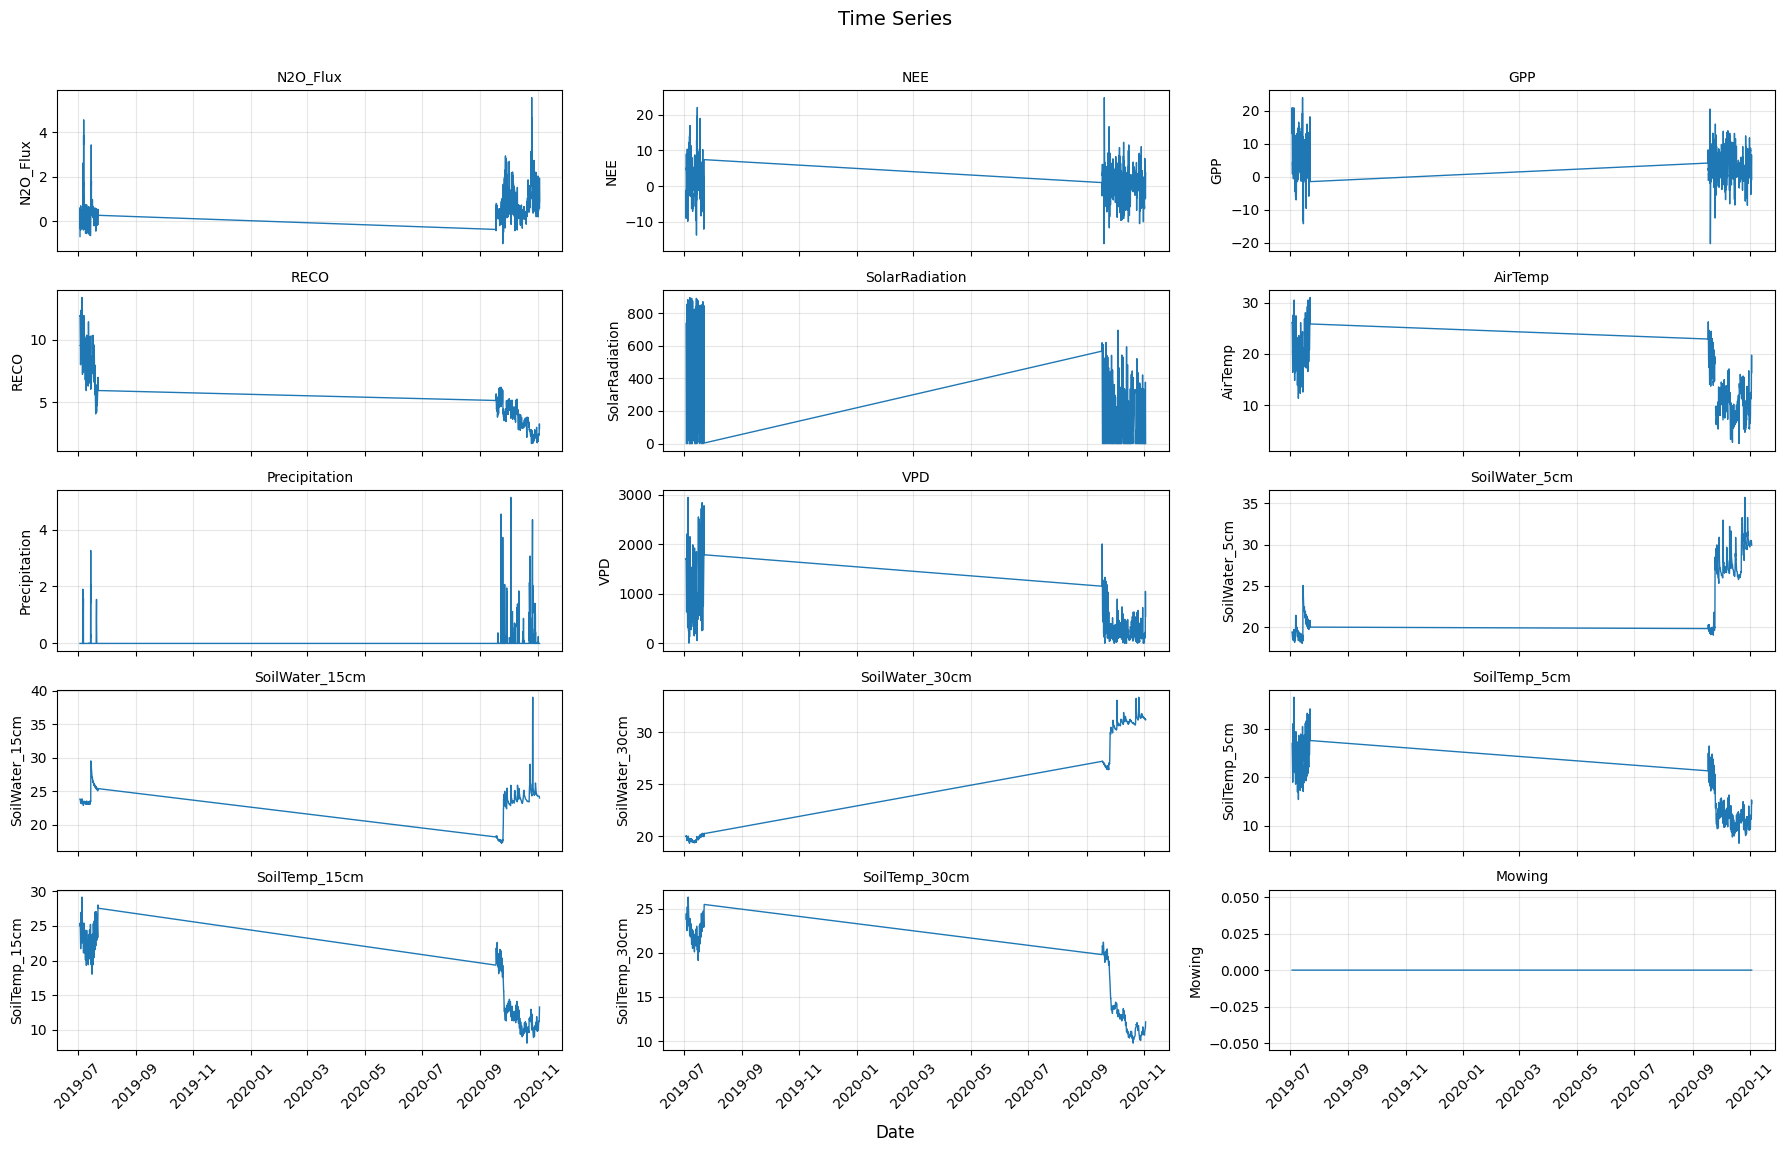

Daily Freq


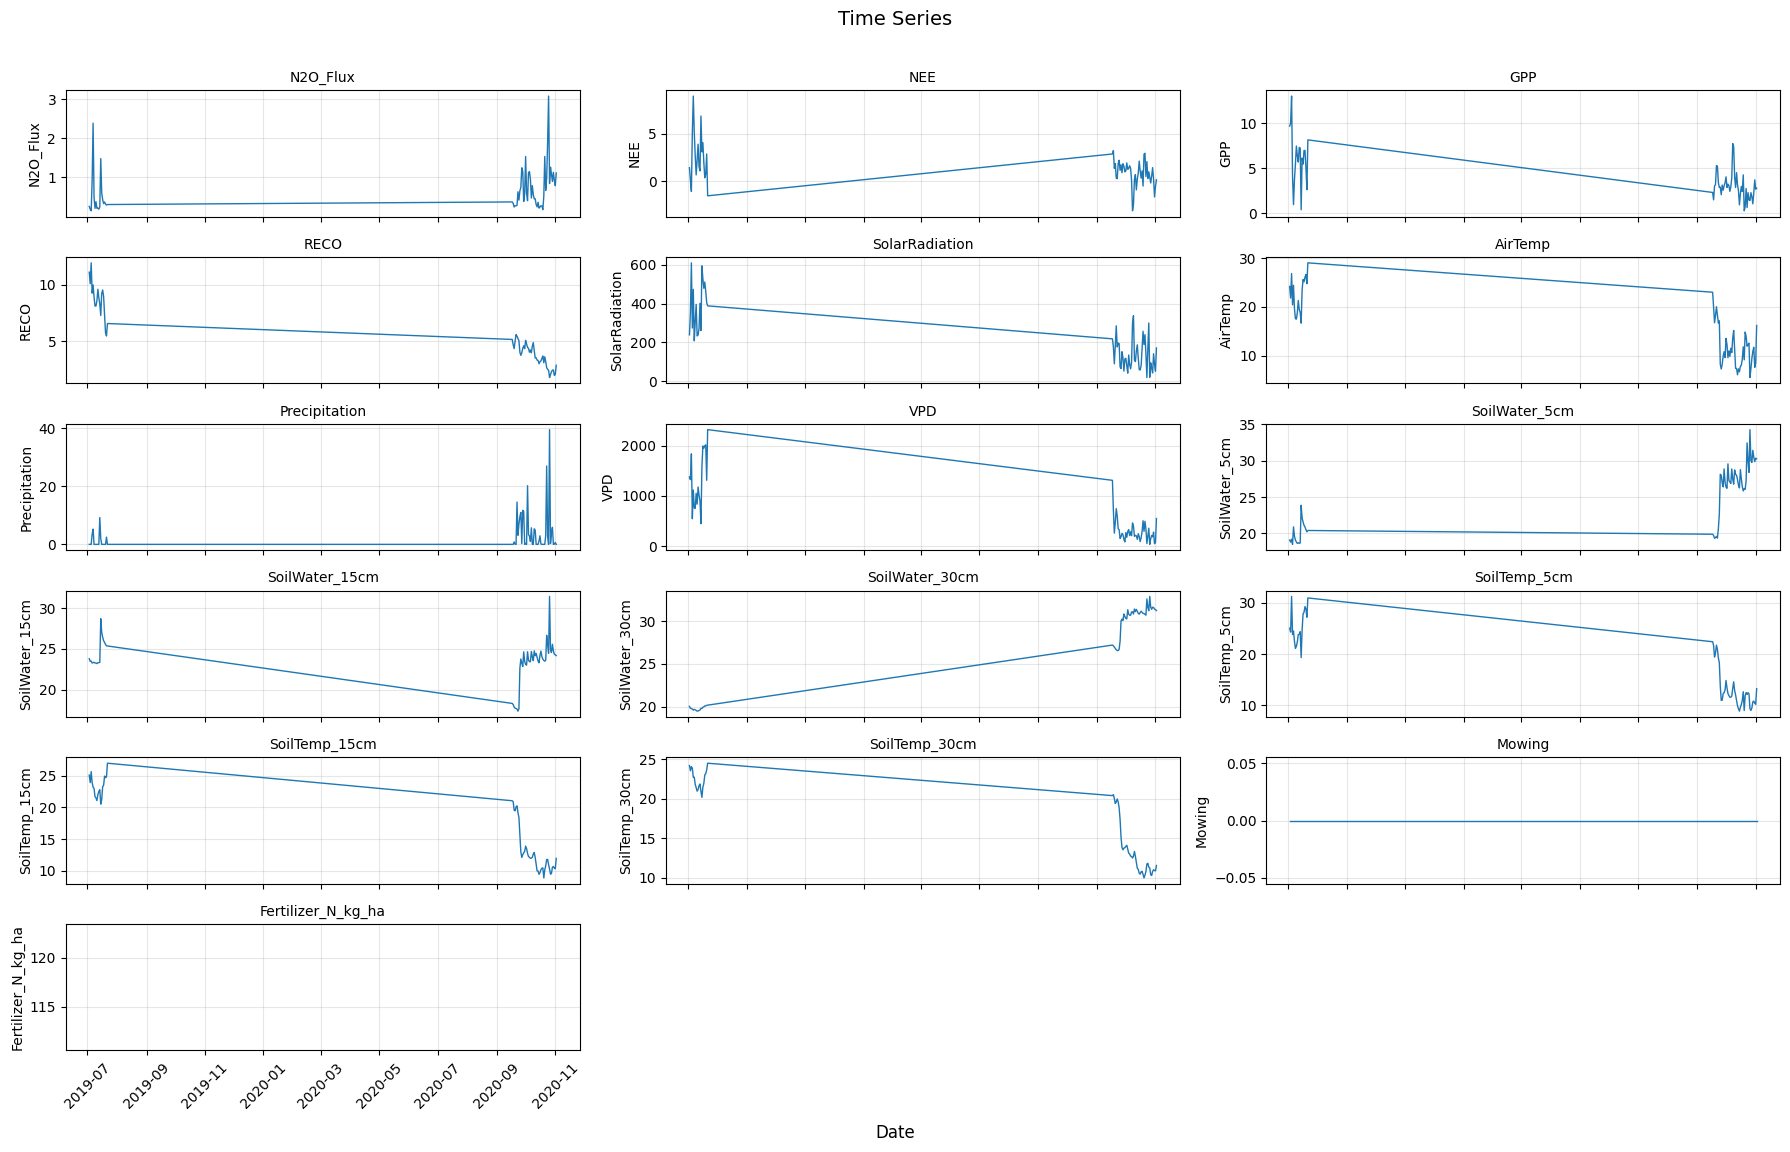

In [48]:
# Variables to plot (excluding Timestamp)
vars_to_plot = [
    "N2O_Flux", "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation",
    "VPD", "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm", "Mowing"
]

# Variables to plot (excluding Timestamp)
vars_to_plot_w_fert = [
    "N2O_Flux", "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation",
    "VPD", "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm", "Mowing",
    "Fertilizer_N_kg_ha"
]

# Daily averages
print("Raw Data")
plot_time_series(aeschi, vars_to_plot)
print("Daily Freq")
plot_time_series(aeschi_daily, vars_to_plot_w_fert)

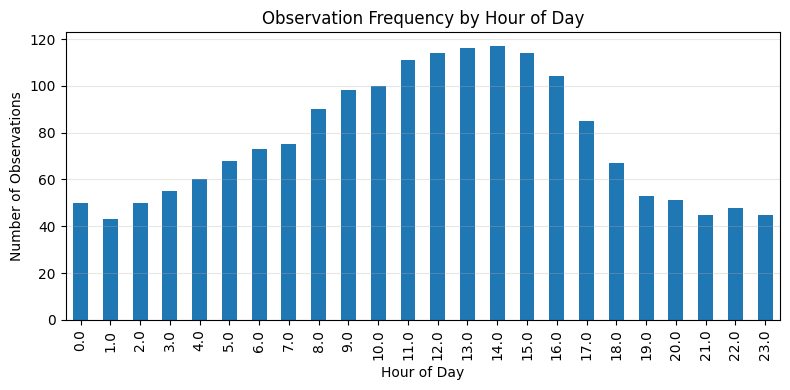

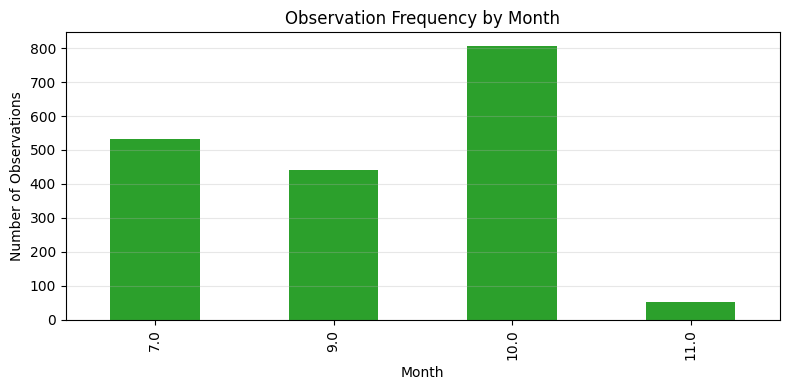

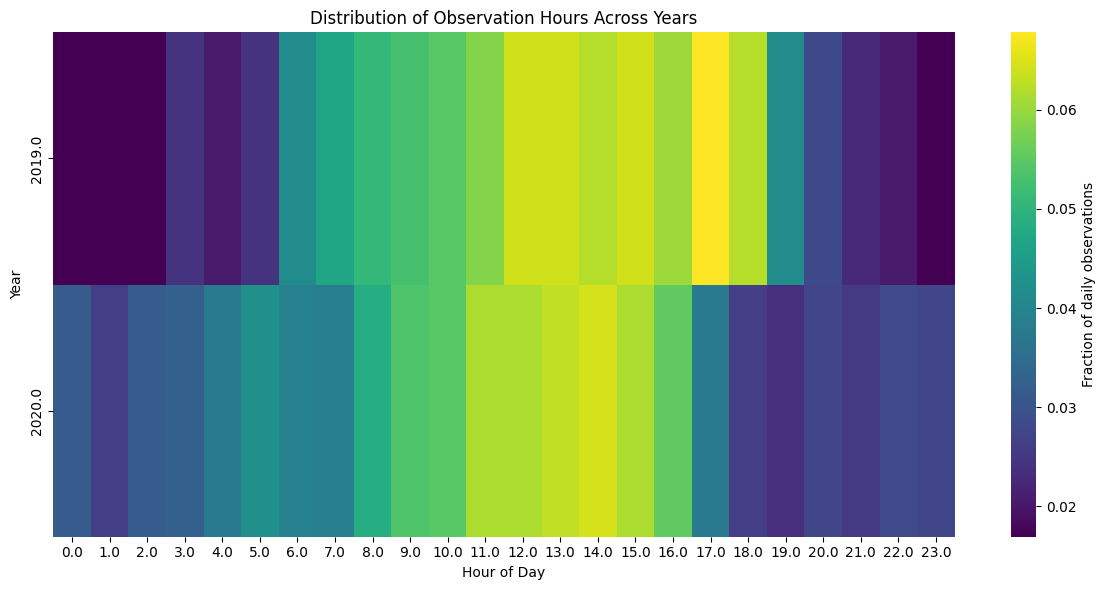

In [53]:
# count observations per hour
hourly_counts = aeschi["hour"].value_counts().sort_index()

# plot
plt.figure(figsize=(8,4))
hourly_counts.plot(kind="bar")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Observations")
plt.title("Observation Frequency by Hour of Day")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# count per month
monthly_counts = aeschi["month"].value_counts().sort_index()

# plot
plt.figure(figsize=(8,4))
monthly_counts.plot(kind="bar", color="tab:green")
plt.xlabel("Month")
plt.ylabel("Number of Observations")
plt.title("Observation Frequency by Month")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

# group by year × hour
hour_year_counts = (
    aeschi.groupby(["year", "hour"])
    .size()
    .unstack(fill_value=0)
)

# normalize by total per year (to compare proportions)
hour_year_norm = hour_year_counts.div(hour_year_counts.sum(axis=1), axis=0)

# plot as heatmap
plt.figure(figsize=(12,6))
sns.heatmap(hour_year_norm, cmap="viridis", cbar_kws={"label": "Fraction of daily observations"})
plt.xlabel("Hour of Day")
plt.ylabel("Year")
plt.title("Distribution of Observation Hours Across Years")
plt.tight_layout()
plt.show()


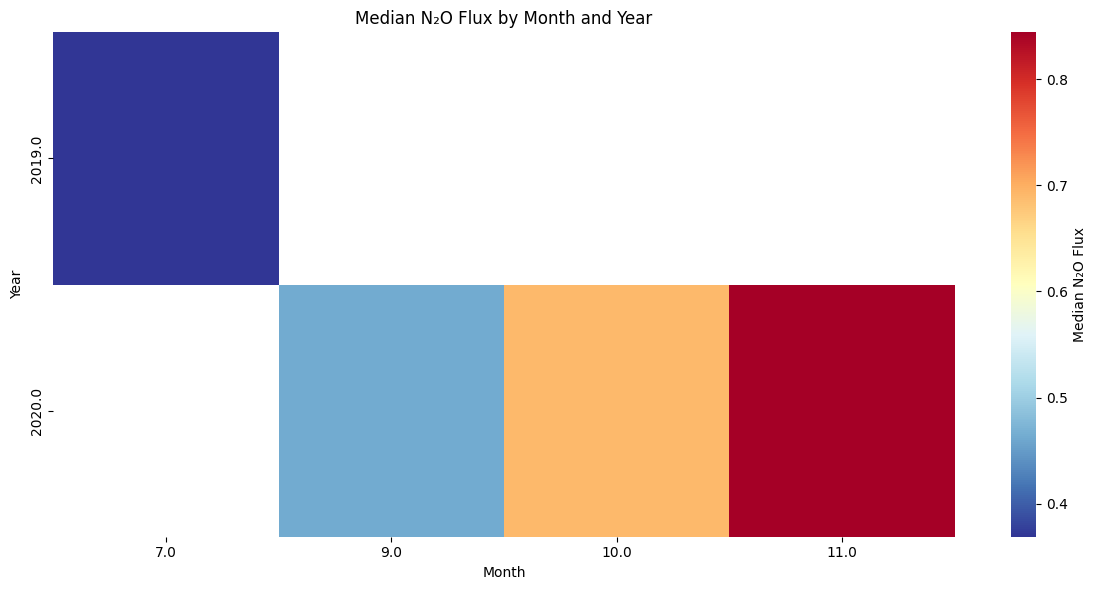

/var/folders/_3/dhm9h5w122sfbk56zms0llk00000gn/T/ipykernel_37164/899757458.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aeschi.groupby(["T5_bin", "T15_bin"])["N2O_Flux"]


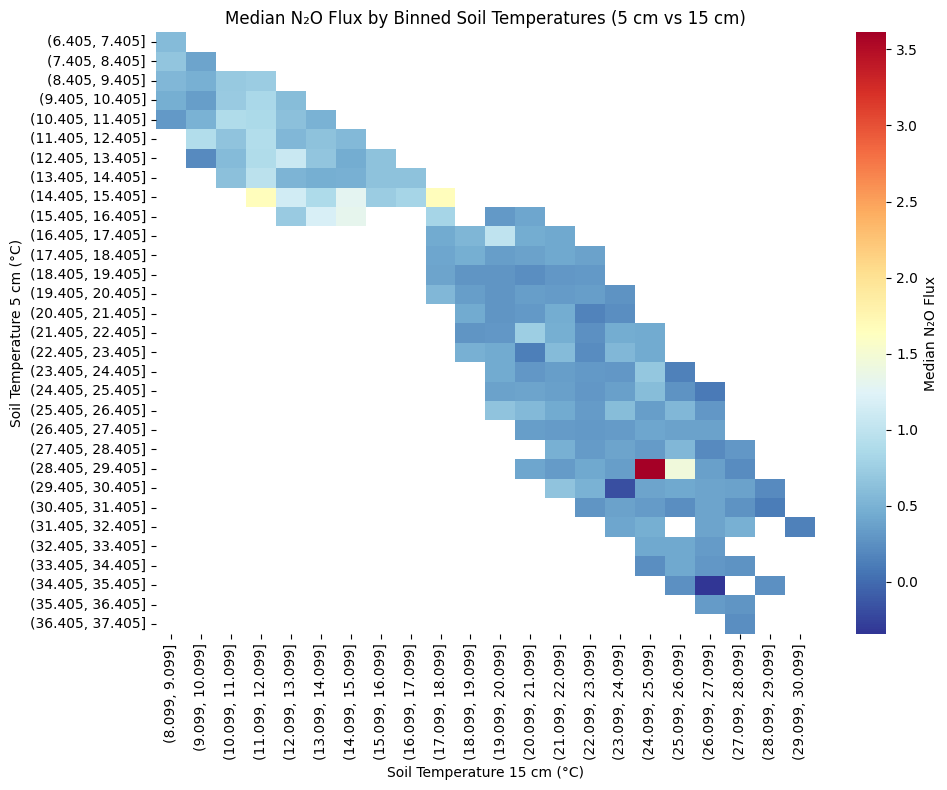

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# compute median N₂O flux per year × hour
median_flux = (
    aeschi.groupby(["year", "month"])["N2O_Flux"]
    .median()
    .unstack(fill_value=np.nan)
)

# plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    median_flux,
    cmap="RdYlBu_r",
    cbar_kws={"label": "Median N₂O Flux"},
)
plt.xlabel("Month")
plt.ylabel("Year")
plt.title("Median N₂O Flux by Month and Year")
plt.tight_layout()
plt.show()

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# define bin edges for both temperatures
bins_5cm = np.arange(aeschi["SoilTemp_5cm"].min(), aeschi["SoilTemp_5cm"].max()+1, 1)
bins_15cm = np.arange(aeschi["SoilTemp_15cm"].min(), aeschi["SoilTemp_15cm"].max()+1, 1)

# create binned categories
aeschi["T5_bin"] = pd.cut(aeschi["SoilTemp_5cm"], bins=bins_5cm)
aeschi["T15_bin"] = pd.cut(aeschi["SoilTemp_15cm"], bins=bins_15cm)

# compute median flux per 2D bin
median_flux_binned = (
    aeschi.groupby(["T5_bin", "T15_bin"])["N2O_Flux"]
    .median()
    .unstack(fill_value=np.nan)
)

# plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(
    median_flux_binned,
    cmap="RdYlBu_r",
    cbar_kws={"label": "Median N₂O Flux"},
)
plt.xlabel("Soil Temperature 15 cm (°C)")
plt.ylabel("Soil Temperature 5 cm (°C)")
plt.title("Median N₂O Flux by Binned Soil Temperatures (5 cm vs 15 cm)")
plt.tight_layout()
plt.show()

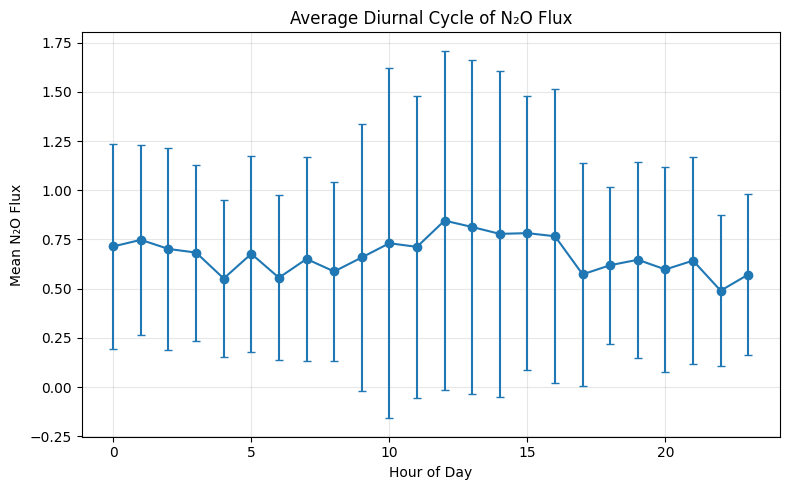

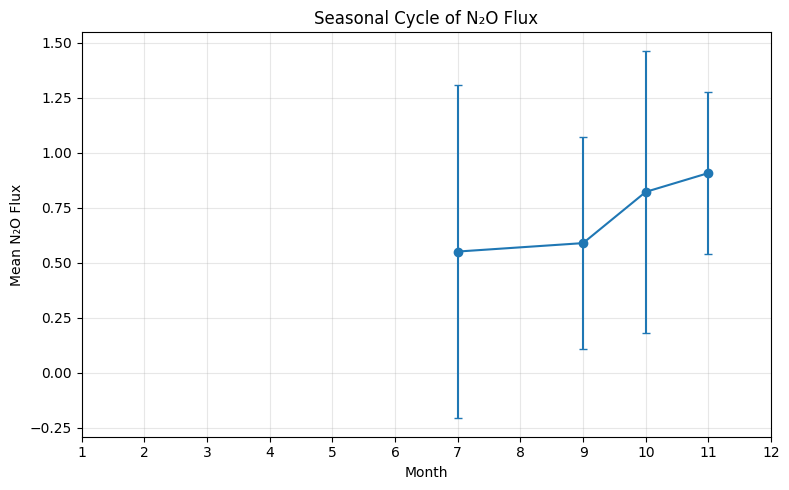

In [56]:
hourly_mean = aeschi.groupby("hour")["N2O_Flux"].mean()
hourly_std  = aeschi.groupby("hour")["N2O_Flux"].std()

plt.figure(figsize=(8, 5))
plt.errorbar(hourly_mean.index, hourly_mean, yerr=hourly_std, fmt="-o", capsize=3)
plt.xlabel("Hour of Day")
plt.ylabel("Mean N₂O Flux")
plt.title("Average Diurnal Cycle of N₂O Flux")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

monthly_mean = aeschi.groupby("month")["N2O_Flux"].mean()
monthly_std  = aeschi.groupby("month")["N2O_Flux"].std()

plt.figure(figsize=(8, 5))
plt.errorbar(monthly_mean.index, monthly_mean, yerr=monthly_std, fmt="-o", capsize=3)
plt.xticks(range(1, 13))
plt.xlabel("Month")
plt.ylabel("Mean N₂O Flux")
plt.title("Seasonal Cycle of N₂O Flux")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

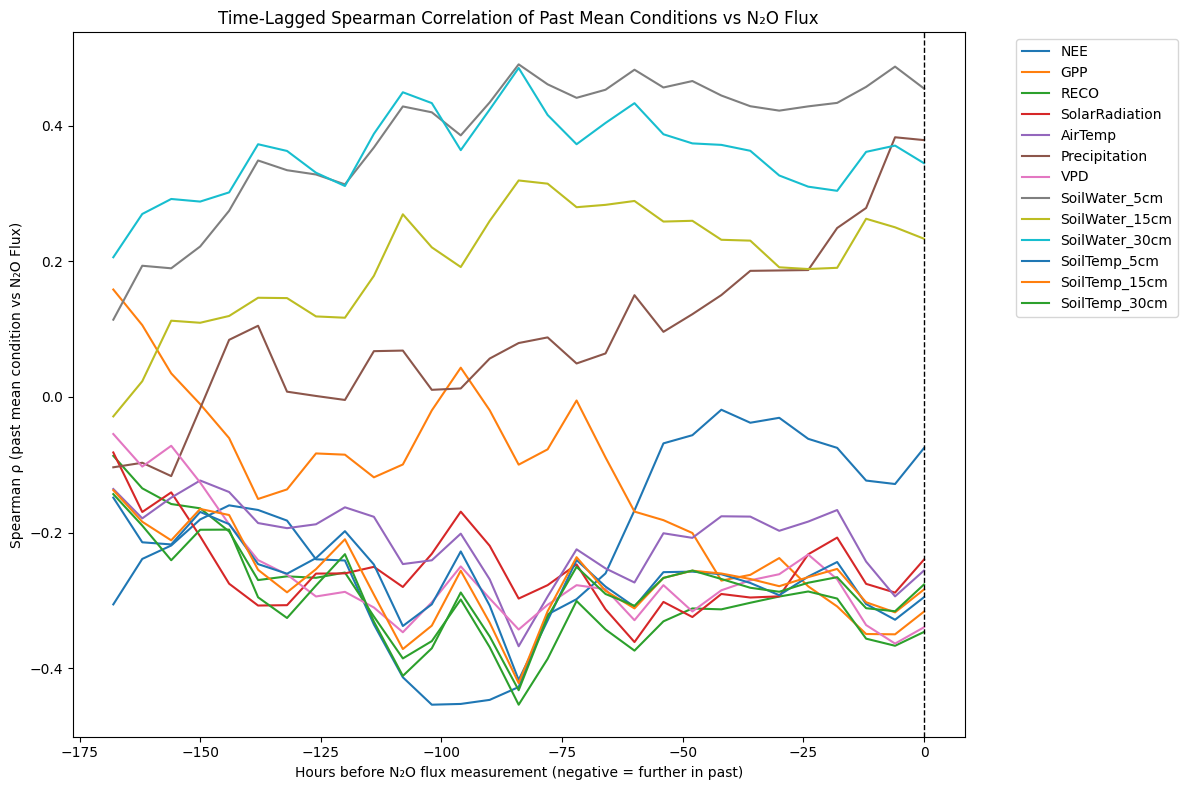

In [57]:
from scipy.stats import spearmanr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Base setup ---
aeschi_time_index = aeschi.copy()

predictors = [
    "NEE", "GPP", "RECO",
    "SolarRadiation", "AirTemp", "Precipitation", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
]

target = "N2O_Flux"

# --- Parameters ---
window_hours = 24        # window size for averaging (past 24h)
step_hours   = 6        # step between lags
max_hours    = 7 * 24    # look back 1 week (you can extend to 5 weeks)
offsets      = range(0, -max_hours - step_hours, -step_hours)  # only past (0, -24, -48, ...)

# --- Rolling mean of predictors (24h backward window) ---
window = f"{window_hours}h"
rolling_means = aeschi_time_index[predictors].rolling(window=window, closed="left").mean()

# --- Compute lag correlations (Spearman) ---
lag_corrs = {}

for var in predictors:
    corrs = []
    for offset in offsets:
        shifted = rolling_means[var].shift(freq=pd.Timedelta(hours=offset))
        aligned = aeschi_time_index[[target]].join(shifted.rename("past_mean")).dropna()
        if len(aligned) > 2:
            rho, _ = spearmanr(aligned[target], aligned["past_mean"])
            corrs.append(rho)
        else:
            corrs.append(np.nan)
    lag_corrs[var] = (list(offsets), corrs)

# --- Plot results ---
plt.figure(figsize=(12, 8))
for var, (offsets, corrs) in lag_corrs.items():
    plt.plot(offsets, corrs, label=var)

plt.axvline(0, color="k", linestyle="--", lw=1)
plt.xlabel("Hours before N₂O flux measurement (negative = further in past)")
plt.ylabel("Spearman ρ (past mean condition vs N₂O Flux)")
plt.title("Time-Lagged Spearman Correlation of Past Mean Conditions vs N₂O Flux")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

/var/folders/_3/dhm9h5w122sfbk56zms0llk00000gn/T/ipykernel_37164/3220280298.py:50: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r, _ = spearmanr(aligned[target], aligned[col])


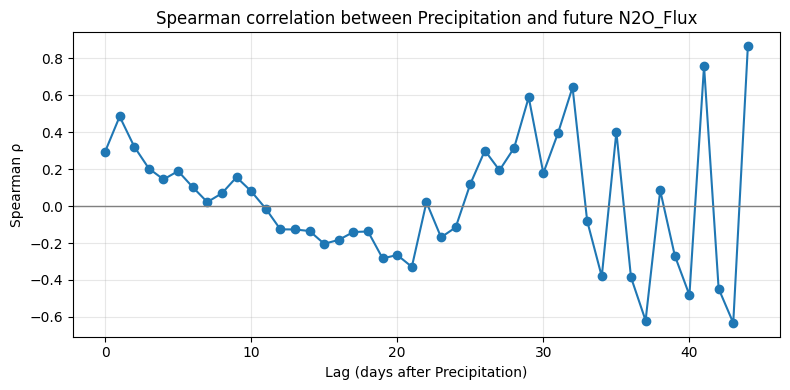

Peak Spearman correlation at lag = 44 days (ρ = 0.866)


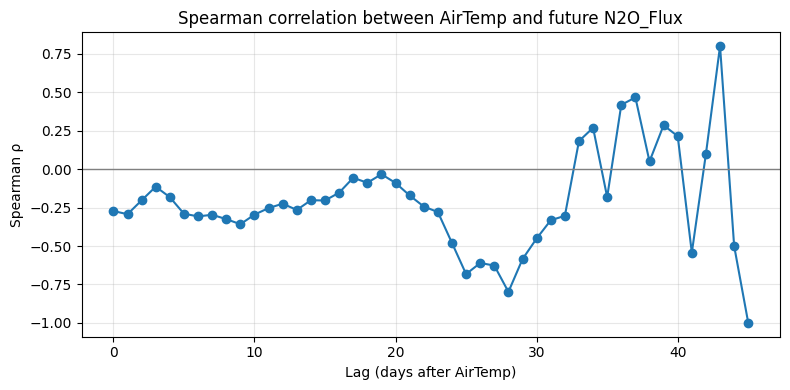

Peak Spearman correlation at lag = 43 days (ρ = 0.800)


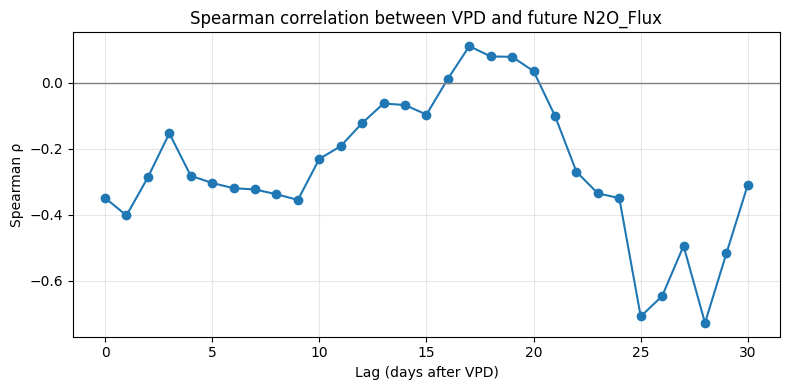

Peak Spearman correlation at lag = 17 days (ρ = 0.111)


In [58]:
from scipy.stats import spearmanr

def plot_lag_correlation(df, col, target="N2O_Flux", max_lag=60, resample_daily=True):
    """
    Compute and plot the Spearman correlation between a predictor and target variable
    over increasing day lags (calendar-based).

    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with a DatetimeIndex.
    col : str
        Column name of the predictor variable (e.g. "Precipitation").
    target : str, optional
        Column name of the target variable, by default "N2O_Flux".
    max_lag : int, optional
        Maximum lag in days, by default 60.
    resample_daily : bool, optional
        If True, resample to daily mean (useful if data is sub-daily).

    Returns
    -------
    pd.DataFrame
        DataFrame with 'lag' and 'spearman_r' for each lag.
    """

    # --- Ensure datetime index ---
    df = df.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # --- Optional daily resampling ---
    if resample_daily:
        df = df.select_dtypes(include=[np.number]).resample("D").mean()

    # --- Filter for valid positive flux values ---
    df = df[df[target] >= 0][[col, target]].dropna(subset=[target])

    # --- Compute lag correlations ---
    lags = np.arange(0, max_lag + 1)
    corrs = []

    for lag in lags:
        shifted = df[col].shift(freq=pd.to_timedelta(lag, unit="D"))
        aligned = pd.concat([df[target], shifted], axis=1, join="inner").dropna()

        if aligned.empty:
            corrs.append(np.nan)
        else:
            r, _ = spearmanr(aligned[target], aligned[col])
            corrs.append(r)

    # --- Store results ---
    result = pd.DataFrame({"lag_days": lags, "spearman_r": corrs})

    # --- Plot ---
    plt.figure(figsize=(8, 4))
    plt.plot(result["lag_days"], result["spearman_r"], marker="o", color="tab:blue")
    plt.axhline(0, color="gray", lw=1)
    plt.xlabel(f"Lag (days after {col})")
    plt.ylabel("Spearman ρ")
    plt.title(f"Spearman correlation between {col} and future {target}")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # --- Report peak correlation ---
    best_lag = result["lag_days"].iloc[np.nanargmax(result["spearman_r"])]
    best_r = np.nanmax(result["spearman_r"])
    print(f"Peak Spearman correlation at lag = {best_lag} days (ρ = {best_r:.3f})")

plot_lag_correlation(aeschi, col="Precipitation", max_lag=60)
plot_lag_correlation(aeschi, col="AirTemp", max_lag=45)
plot_lag_correlation(aeschi, col="VPD", max_lag=30)

/var/folders/_3/dhm9h5w122sfbk56zms0llk00000gn/T/ipykernel_37164/1239524854.py:25: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho = np.nan if aligned.empty else spearmanr(aligned[target], aligned[var])[0]


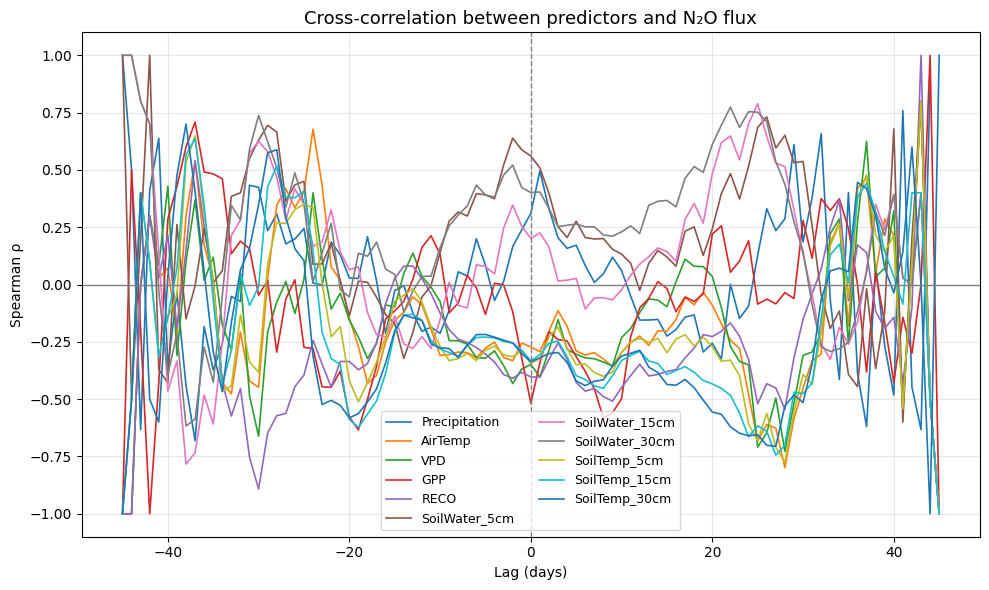

          Variable  Best lag (days)  Max corr (ρ)
1          AirTemp              -44          -1.0
2              VPD              -44          -1.0
3              GPP               44           1.0
4             RECO              -44          -1.0
6   SoilWater_15cm              -44           1.0
7   SoilWater_30cm              -44           1.0
10   SoilTemp_30cm               44          -1.0
0    Precipitation              -45           1.0
5    SoilWater_5cm              -45           1.0
8     SoilTemp_5cm              -45          -1.0
9    SoilTemp_15cm              -45          -1.0


In [59]:
def cross_correlation_single(df, predictor_vars, target="N2O_Flux", max_lag=60):
    df = df.copy()
    if not isinstance(df.index, pd.DatetimeIndex):
        if "Date" in df.columns:
            df["Date"] = pd.to_datetime(df["Date"])
            df = df.set_index("Date")
        else:
            raise ValueError("DataFrame must have a DatetimeIndex or 'Date' column")

    df = df[df[target] >= 0].dropna(subset=[target])
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    predictor_vars = [v for v in predictor_vars if v in numeric_cols]
    lags = np.arange(-max_lag, max_lag + 1)
    
    # Sort by index
    df = df.sort_index()
    corrs_dict = {}

    # Compute correlations for each predictor
    for var in predictor_vars:
        corrs = []
        for lag in lags:
            shifted = df[var].shift(freq=pd.to_timedelta(lag, unit="D"))
            aligned = pd.concat([df[target], shifted], axis=1, join="inner").dropna()
            rho = np.nan if aligned.empty else spearmanr(aligned[target], aligned[var])[0]
            corrs.append(rho)
        corrs_dict[var] = corrs

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for var, corrs in corrs_dict.items():
        ax.plot(lags, corrs, lw=1.2, label=var)

    ax.axhline(0, color="gray", lw=1)
    ax.axvline(0, color="gray", lw=1, ls="--")
    ax.set_xlabel("Lag (days)")
    ax.set_ylabel("Spearman ρ")
    ax.set_title("Cross-correlation between predictors and N₂O flux", fontsize=13)
    ax.grid(True, alpha=0.3)
    ax.legend(loc="best", ncol=2, fontsize=9)
    plt.tight_layout()
    plt.show()

    # --- Summary ---
    summary_rows = []
    for var, corrs in corrs_dict.items():
        best_idx = np.nanargmax(np.abs(corrs))
        summary_rows.append({
            "Variable": var,
            "Best lag (days)": int(lags[best_idx]),
            "Max corr (ρ)": corrs[best_idx],
        })

    summary_df = pd.DataFrame(summary_rows)
    summary_df = (
        summary_df
        .sort_values(
            by="Max corr (ρ)",
            ascending=False,
            key=lambda col: np.abs(col) if col.name == "Max corr (ρ)" else col
        )
        .round(3)
    )

    return summary_df

predictors = [
    "Precipitation", "AirTemp", "VPD", "GPP", "RECO",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm"
]

summary = cross_correlation_single(aeschi_daily, predictor_vars=predictors, max_lag=60)
print(summary)

# PCA plots

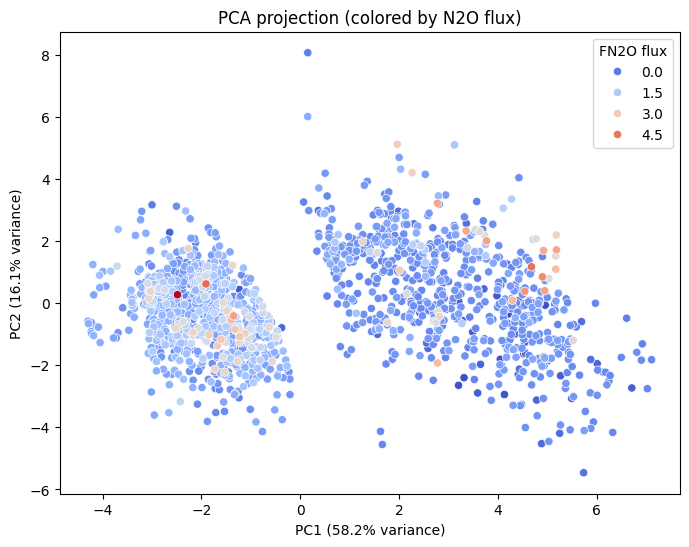

In [7]:
aeschi_clean = aeschi.dropna()
aeschi_clean = aeschi_clean.sort_values(
    by="N2O_Flux",
    ascending=True  # ascending puts zeros first, descending puts them last
)

X = aeschi_clean.drop(columns=["N2O_Flux", "Timestamp", "time_diff"])
y = aeschi_clean["N2O_Flux"]

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize predictors
X_scaled = StandardScaler().fit_transform(X)

# Run PCA (2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df["FN2O"] = y.values

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="FN2O", palette="coolwarm")
plt.title("PCA projection (colored by N2O flux)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)")
plt.legend(title="FN2O flux", loc="best")
plt.show()

In [17]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=X.columns,
    columns=["PC1", "PC2"]
)
print(loadings.sort_values("PC1", ascending=False))

                     PC1       PC2
SoilTemp_5cm    0.355022  0.010072
SoilTemp_15cm   0.348156  0.144734
AirTemp         0.341562 -0.015154
SoilTemp_30cm   0.337863  0.175352
RECO            0.333656  0.028378
VPD             0.310432 -0.096588
SolarRadiation  0.235050 -0.357525
GPP             0.178765 -0.567042
NEE             0.026683  0.652341
Mowing          0.000000  0.000000
Precipitation  -0.073779  0.147054
SoilWater_15cm -0.074766 -0.087011
SoilWater_5cm  -0.320622 -0.139121
SoilWater_30cm -0.335391 -0.119910


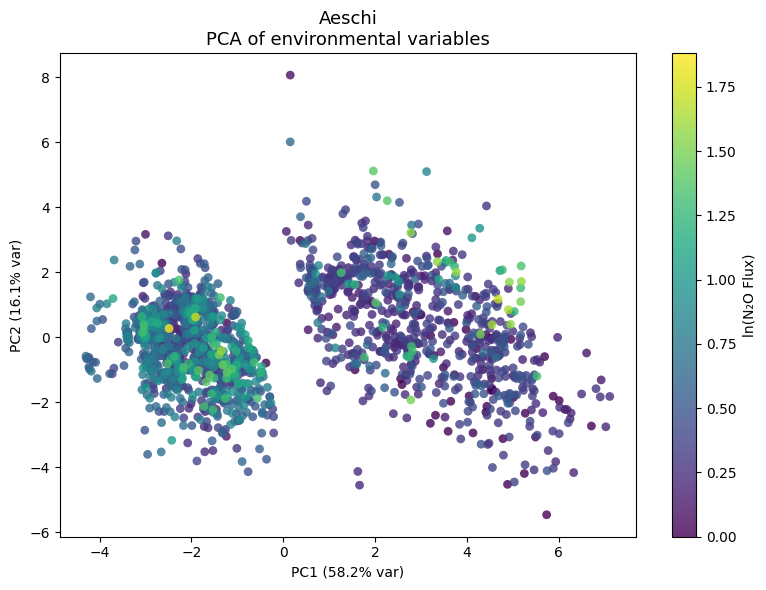

In [8]:
import matplotlib.cm as cm

# --- transformation ---
aeschi_clean["N2O_Flux_ln"] = np.where(
    aeschi_clean["N2O_Flux"] > 0,
    np.log1p(aeschi_clean["N2O_Flux"]),
    0
)

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing",
]

def plot_pca(df, title):
    # Drop rows with missing values in required columns
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()
    
    # Standardize variables
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])
    
    # Run PCA
    pca = PCA(n_components=2)
    pcs = pca.fit_transform(X_scaled)
    df_clean["PC1"] = pcs[:, 0]
    df_clean["PC2"] = pcs[:, 1]

    # Sort by N2O_Flux (so larger appear on top)
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["PC1"], df_clean["PC2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=40, alpha=0.8, edgecolor="none"
    )

    # Labels and aesthetics
    ax.set_title(f"{title}\nPCA of environmental variables", fontsize=13)
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for aeschi
# =============================================
plot_pca(aeschi_clean, "Aeschi")


# t-SNE plots

In [18]:
from sklearn.preprocessing import StandardScaler

# Drop or fill NaNs
X = X.dropna()
y = y.loc[X.index]

# Scale predictors
X_scaled = StandardScaler().fit_transform(X)

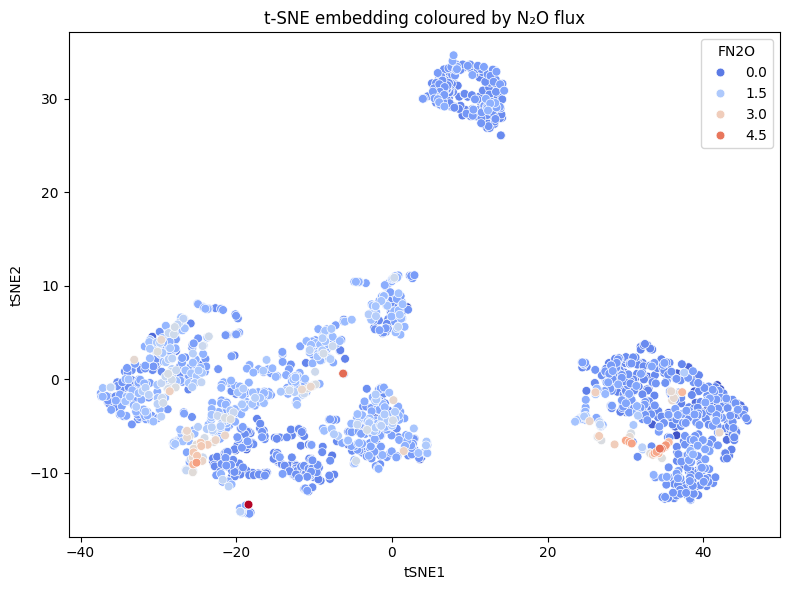

In [10]:
from sklearn.manifold import TSNE

tsne_1 = TSNE(n_components=2, perplexity=90, random_state=42)
X_tsne_1 = tsne_1.fit_transform(X_scaled)

tsne_df_1 = pd.DataFrame(X_tsne_1, columns=["tSNE1", "tSNE2"])
tsne_df_1["FN2O"] = y.values

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_df_1, x="tSNE1", y="tSNE2",
    hue="FN2O", palette="coolwarm", s=40
)
plt.title("t-SNE embedding coloured by N₂O flux")
plt.tight_layout()
plt.show()

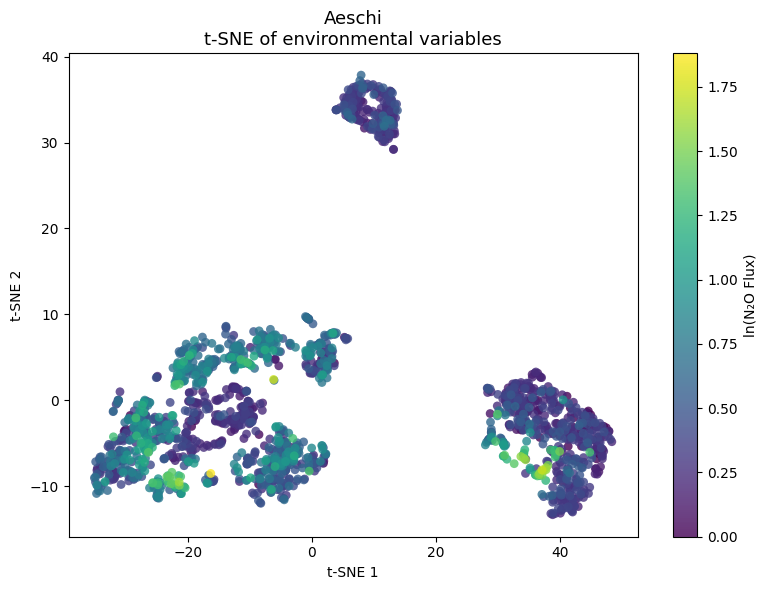

In [11]:
# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing",
]

def plot_tsne(df, title, perplexity=100, learning_rate=200, random_state=42):
    # Drop missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()

    # Standardize features
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run t-SNE
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        learning_rate=learning_rate,
        init="pca",
        random_state=random_state
    )
    tsne_results = tsne.fit_transform(X_scaled)

    df_clean["tSNE1"] = tsne_results[:, 0]
    df_clean["tSNE2"] = tsne_results[:, 1]

    # Sort by N2O_Flux for plotting order
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["tSNE1"], df_clean["tSNE2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=40, alpha=0.8, edgecolor="none"
    )

    ax.set_title(f"{title}\nt-SNE of environmental variables", fontsize=13)
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for aeschi
# =============================================
plot_tsne(aeschi_clean, "Aeschi")

# UMAP plots

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


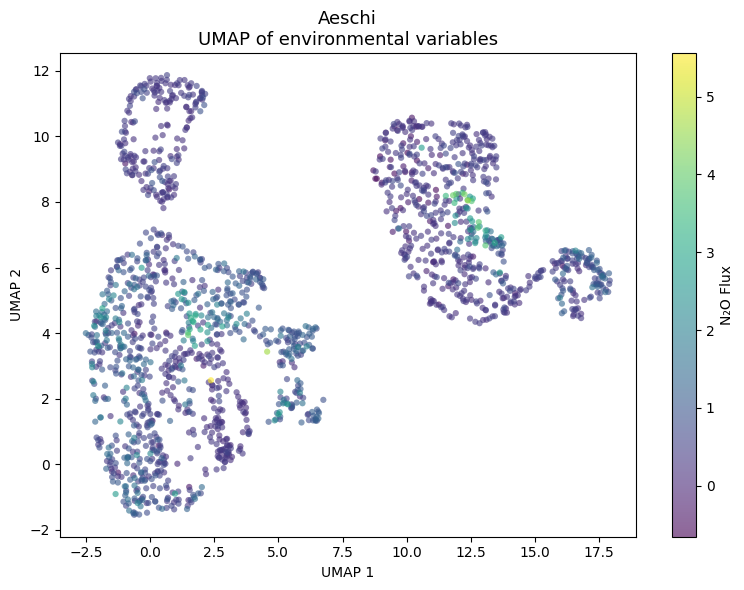

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.cm as cm

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing",
]


def plot_umap(df, title, n_neighbors=50, min_dist=0.5, random_state=42):
    # Drop rows with missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux"]).copy()

    # Standardize
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run UMAP
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric="euclidean",
        random_state=random_state
    )
    embedding = reducer.fit_transform(X_scaled)
    df_clean["UMAP1"] = embedding[:, 0]
    df_clean["UMAP2"] = embedding[:, 1]

    # Sort by N2O_Flux so high values are plotted last (on top)
    df_clean = df_clean.sort_values("N2O_Flux", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["UMAP1"], df_clean["UMAP2"],
        c=df_clean["N2O_Flux"],
        cmap=cm.viridis,
        s=20, alpha=0.6, edgecolor="none"
    )

    ax.set_title(f"{title}\nUMAP of environmental variables", fontsize=13)
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("N₂O Flux")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for aeschi
# =============================================
plot_umap(aeschi_clean, "Aeschi")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


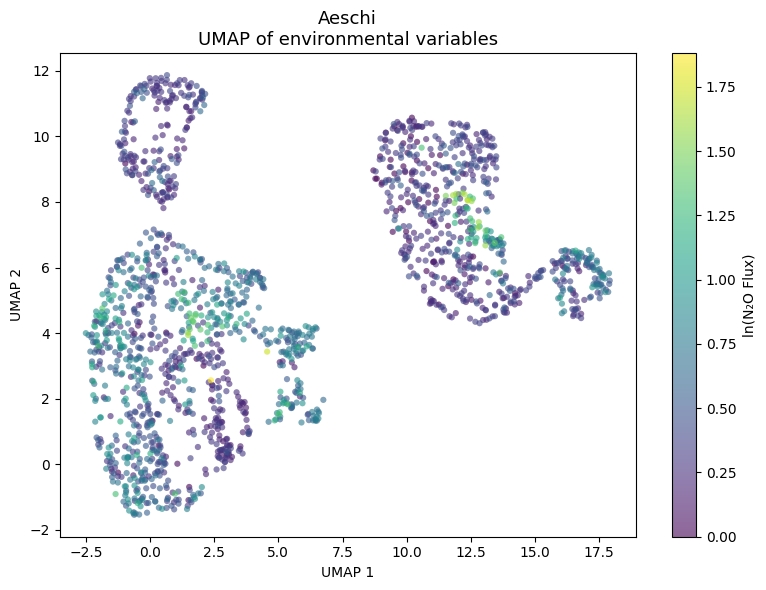

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.cm as cm

# =============================================
# 1️⃣ Define variables and plotting function
# =============================================
base_vars = [
    "Precipitation", "SolarRadiation", "AirTemp", "VPD",
    "SoilWater_5cm", "SoilWater_15cm", "SoilWater_30cm",
    "SoilTemp_5cm", "SoilTemp_15cm", "SoilTemp_30cm",
    "NEE", "GPP", "RECO", "Mowing",
]


def plot_umap(df, title, n_neighbors=50, min_dist=0.5, random_state=42):
    # Drop rows with missing values
    df_clean = df.dropna(subset=base_vars + ["N2O_Flux_ln"]).copy()

    # Standardize
    X_scaled = StandardScaler().fit_transform(df_clean[base_vars])

    # Run UMAP
    reducer = umap.UMAP(
        n_components=2,
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        metric="euclidean",
        random_state=random_state
    )
    embedding = reducer.fit_transform(X_scaled)
    df_clean["UMAP1"] = embedding[:, 0]
    df_clean["UMAP2"] = embedding[:, 1]

    # Sort by N2O_Flux so high values are plotted last (on top)
    df_clean = df_clean.sort_values("N2O_Flux_ln", ascending=True)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sc = ax.scatter(
        df_clean["UMAP1"], df_clean["UMAP2"],
        c=df_clean["N2O_Flux_ln"],
        cmap=cm.viridis,
        s=20, alpha=0.6, edgecolor="none"
    )

    ax.set_title(f"{title}\nUMAP of environmental variables", fontsize=13)
    ax.set_xlabel("UMAP 1")
    ax.set_ylabel("UMAP 2")
    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label("ln(N₂O Flux)")
    plt.tight_layout()
    plt.show()

# =============================================
# 2️⃣ Run for aeschi
# =============================================
plot_umap(aeschi_clean, "Aeschi")